In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

***
###Content of dataset
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* obj_ID = Object Identifier, the unique value that identifies the object in the *image catalog used by the CAS

* alpha = Right Ascension angle (at J2000 epoch)

* delta = Declination angle (at J2000 epoch)

* u = Ultraviolet filter in the photometric system

* g = Green filter in the photometric system

* r = Red filter in the photometric system

* i = Near Infrared filter in the photometric system

* z = Infrared filter in the photometric system

* run_ID = Run Number used to identify the specific scan

* rereun_ID = Rerun Number to specify how the image was processed

* cam_col = Camera column to identify the scanline within the run

* field_ID = Field number to identify each field

* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means * 
that 2 different observations with the same spec_obj_ID must share the output class)

* class = object class (galaxy, star or quasar object)

* redshift = redshift value based on the increase in wavelength

* plate = plate ID, identifies each plate in SDSS

* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data 
was taken

* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# What problem we are trying to solve?
 `We want to classifify stellar into galaxy, star or quasar object using ml.`

# Install the libraries

In [ ]:
!pip install pycaret klib sweetviz

# Import The libraries

In [165]:
import pandas as pd
import numpy as np
import klib
import sweetviz as sv
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#Data Preparartion and Cleaning

## Extract Data from google drive

In [166]:
!unzip '/content/drive/MyDrive/Machine Learning/01_Stellar_Classification/stellar.zip' -d './data'

Archive:  /content/drive/MyDrive/Machine Learning/01_Stellar_Classification/stellar.zip
replace ./data/star_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [167]:
data_file = './data/star_classification.csv'

## Load data to pandas dataframe

In [168]:
df=pd.read_csv(data_file)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Dropping Unwanted columns
Dropping Unwanted Column from dataframe because some of them are not needed to us as per the data description

In [169]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [170]:
df = df[['alpha','delta','u','g','r','i','z','redshift','class']]

In [171]:
df

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


In [172]:
# making a initial copy of df
df_int = df.copy()

## EDA

                                             |          | [  0%]   00:00 -> (? left)


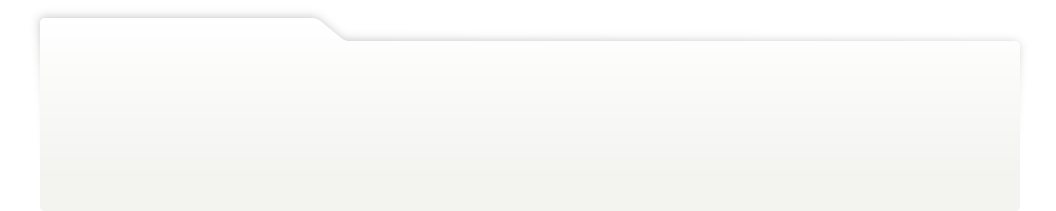
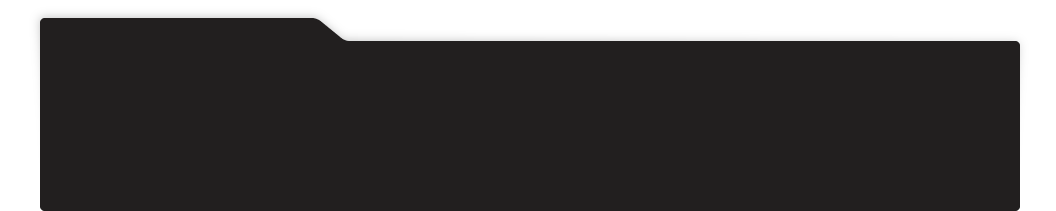
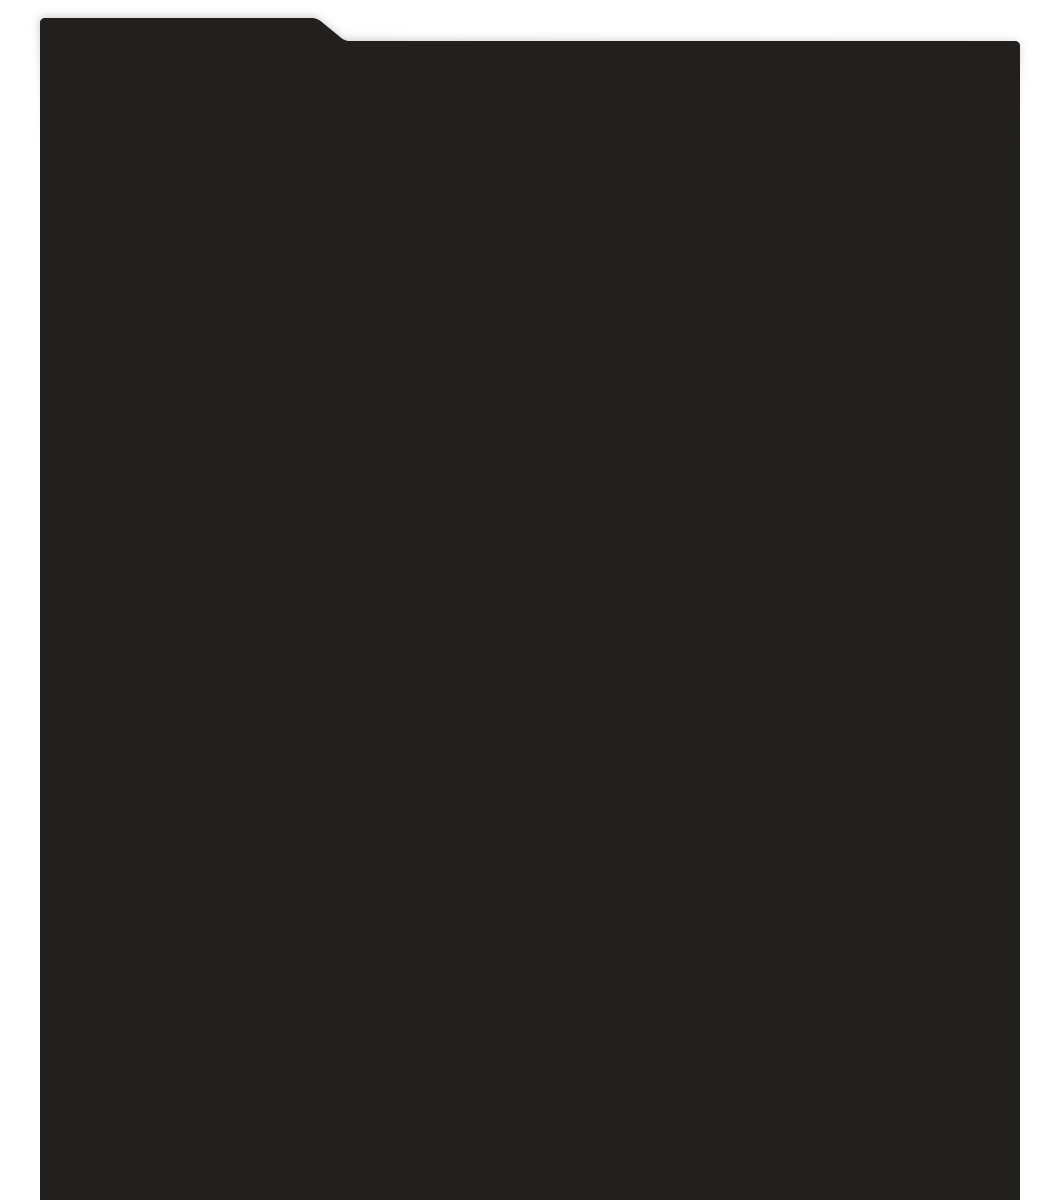
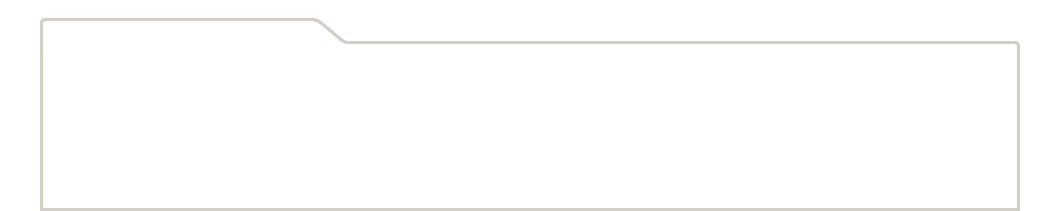
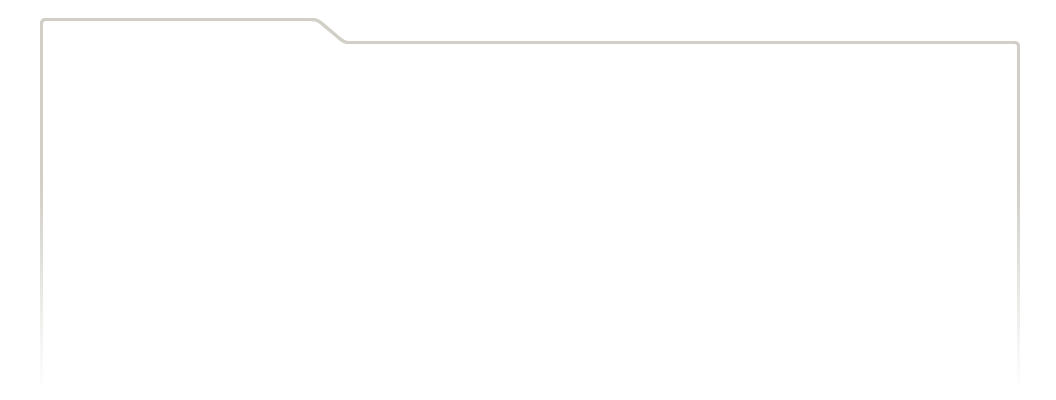
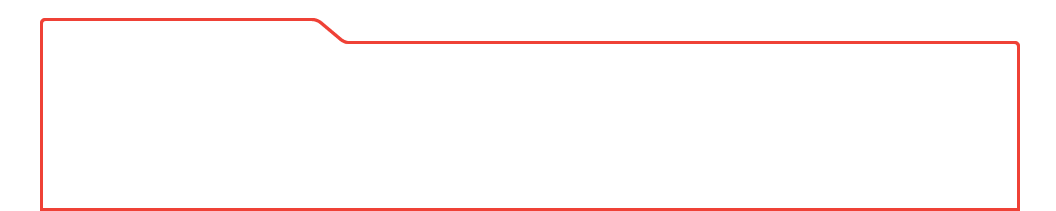
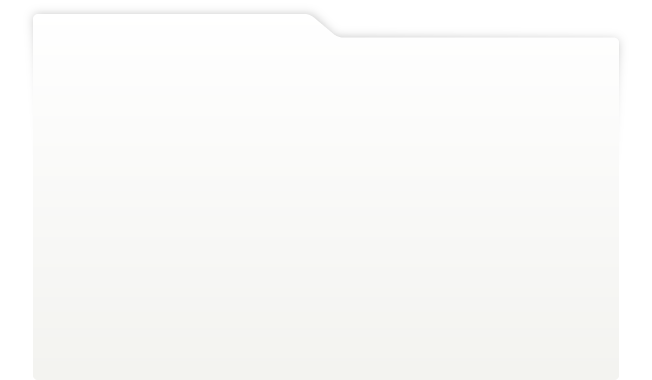
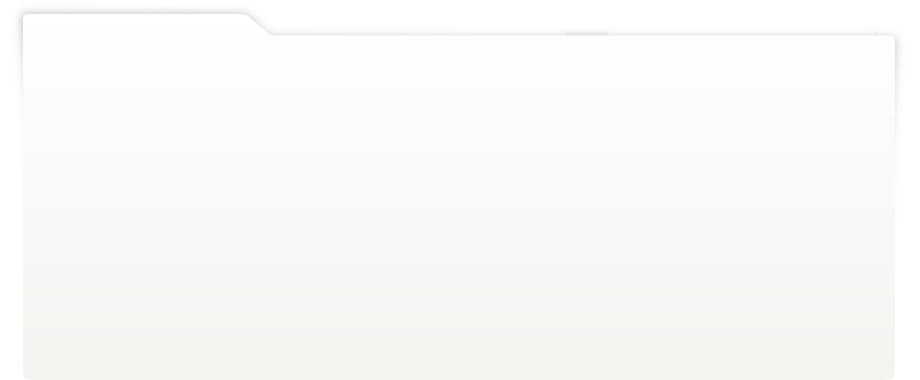
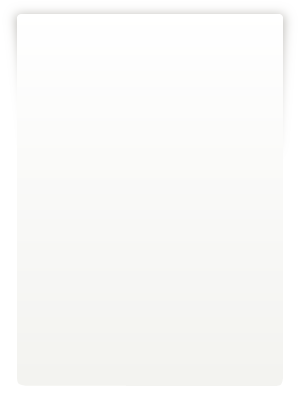
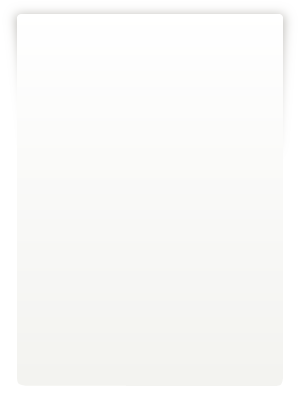
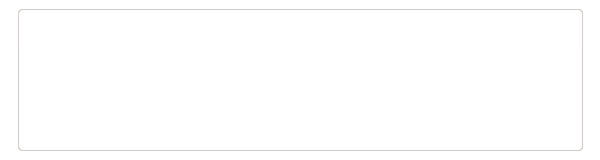
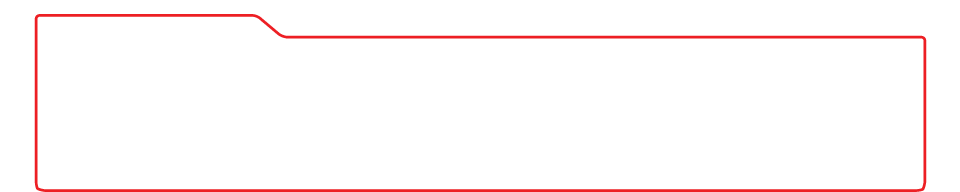
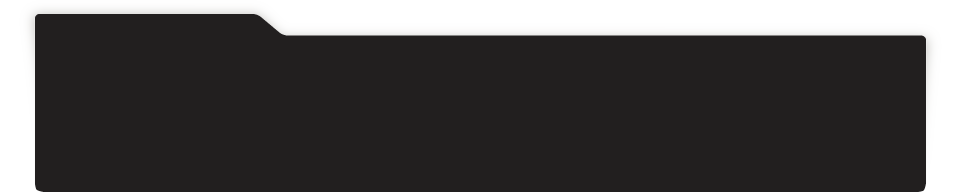
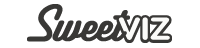
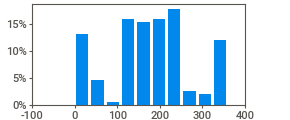
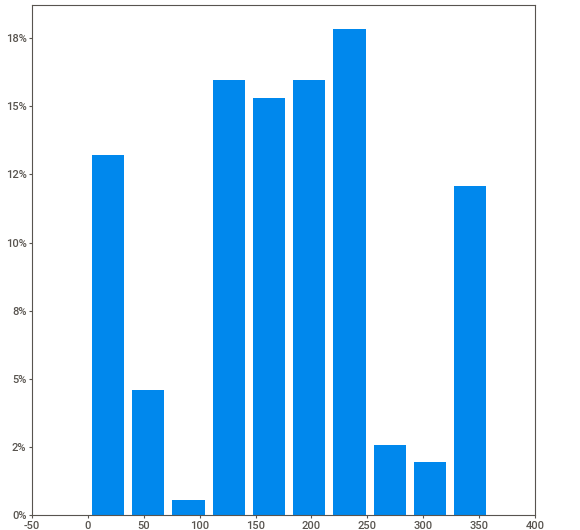
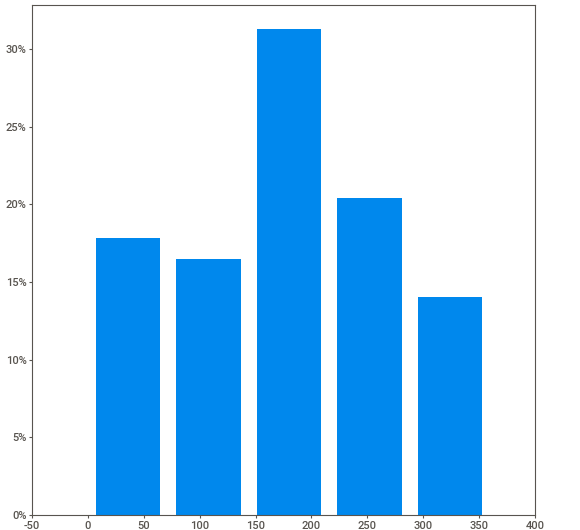
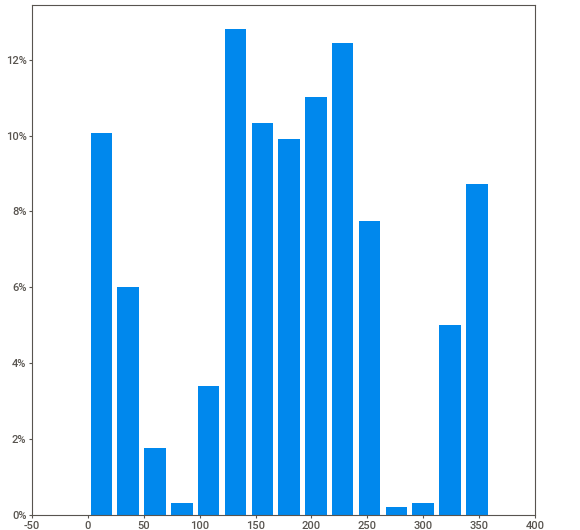
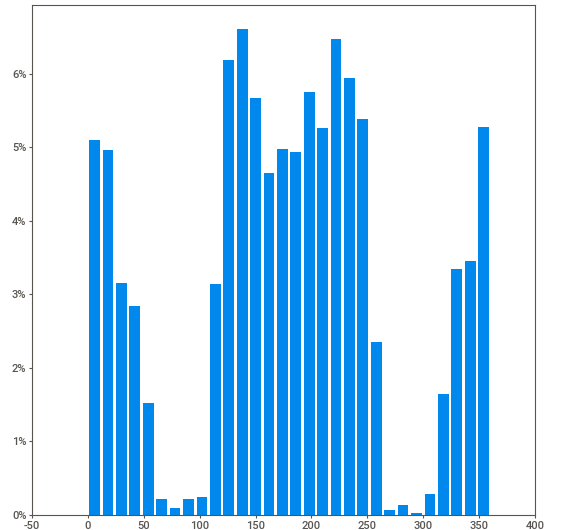
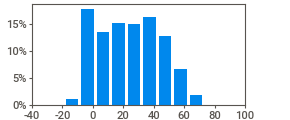
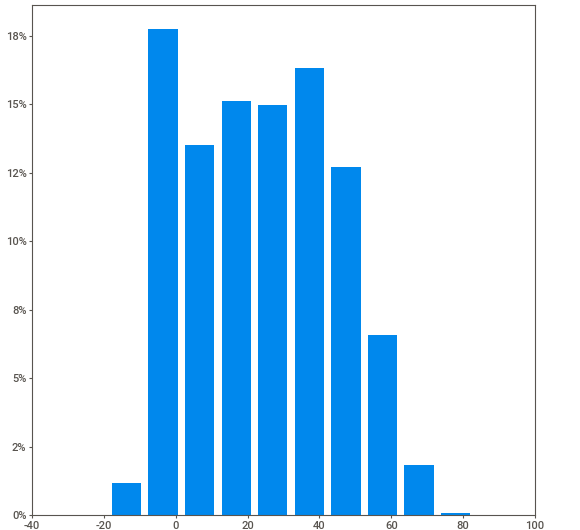
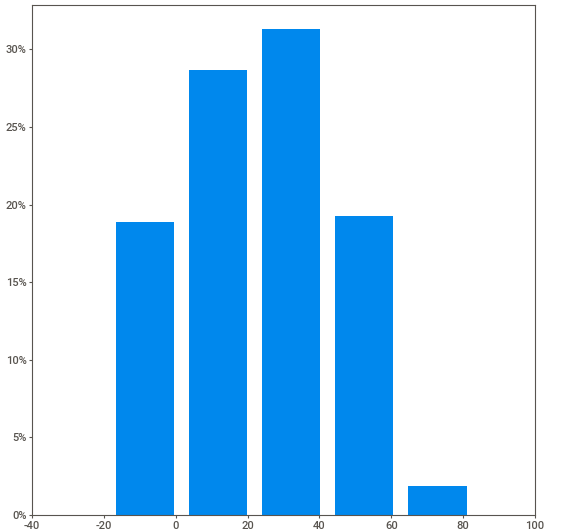
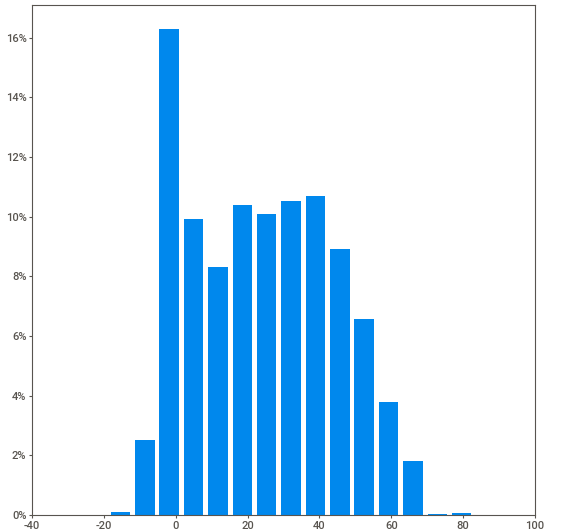
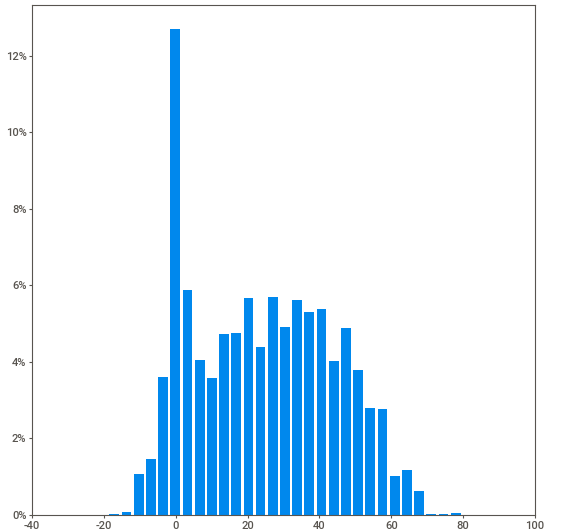
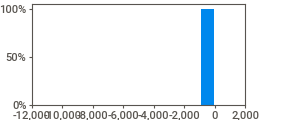
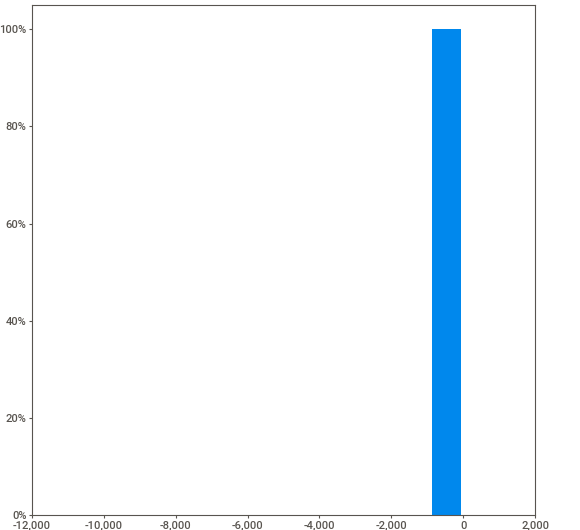
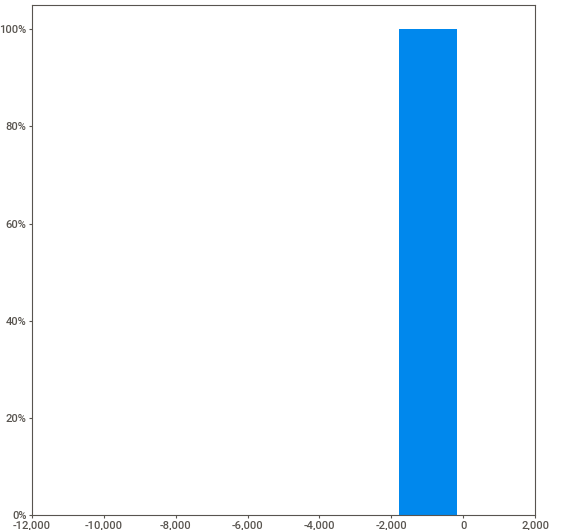
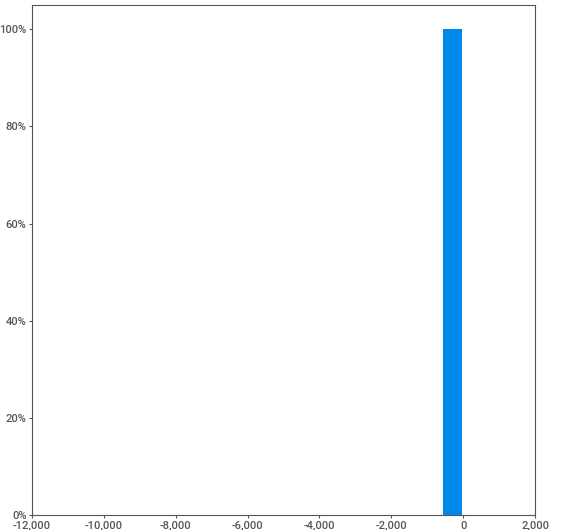
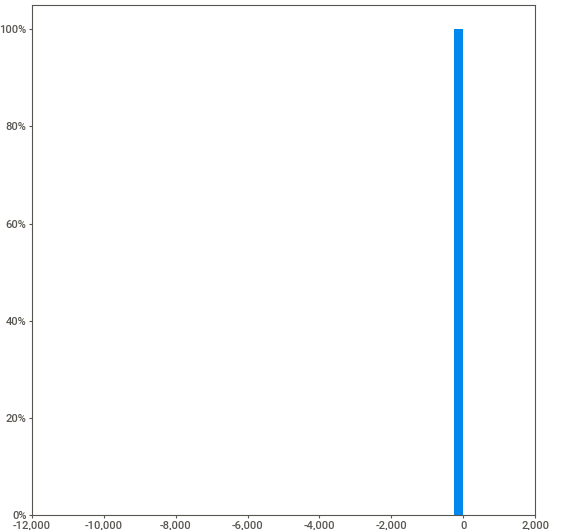
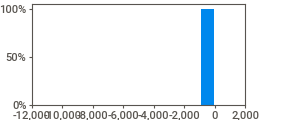
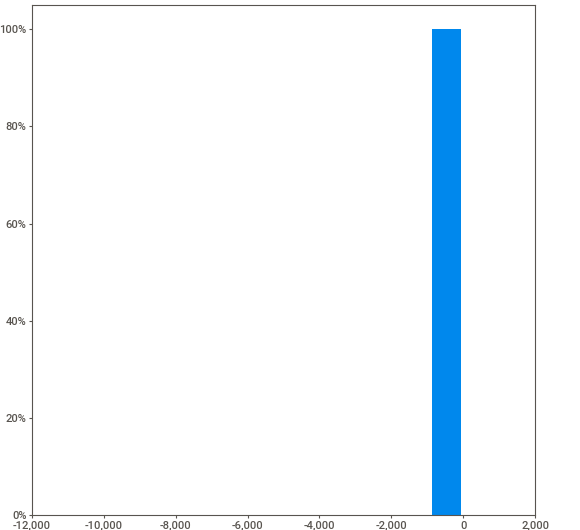
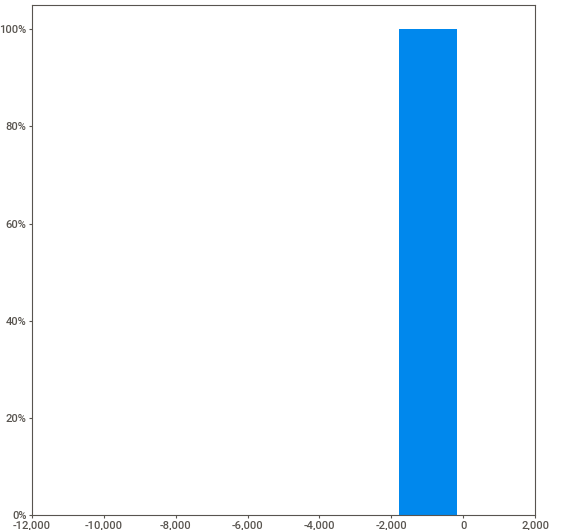
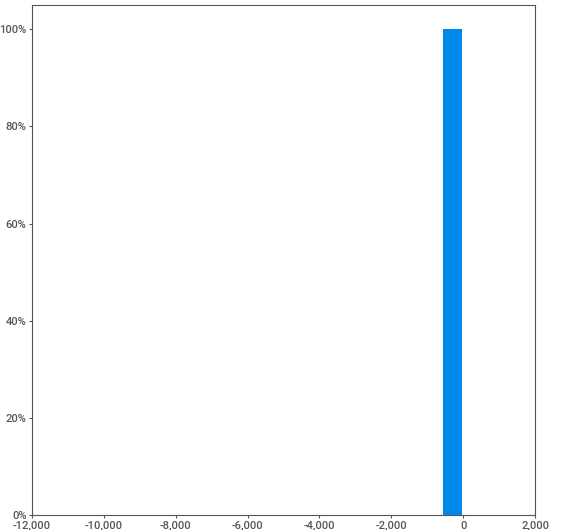
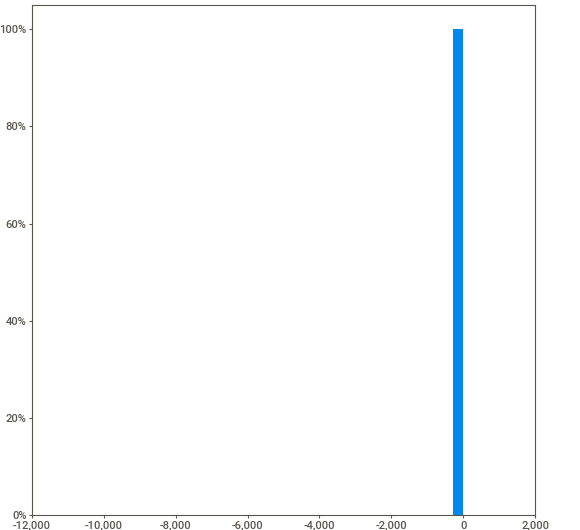
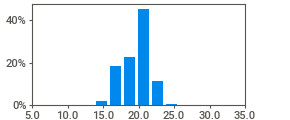
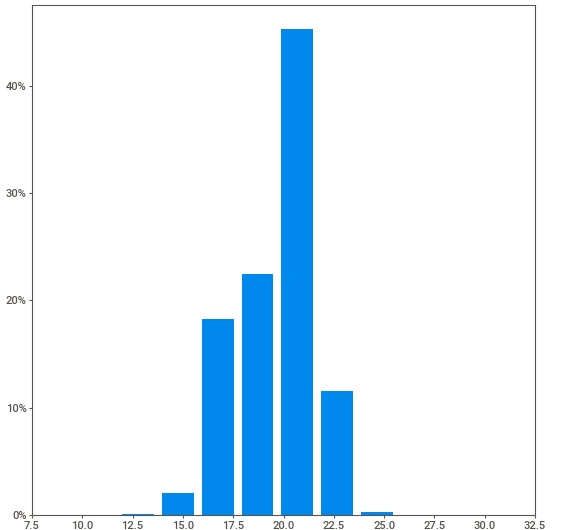
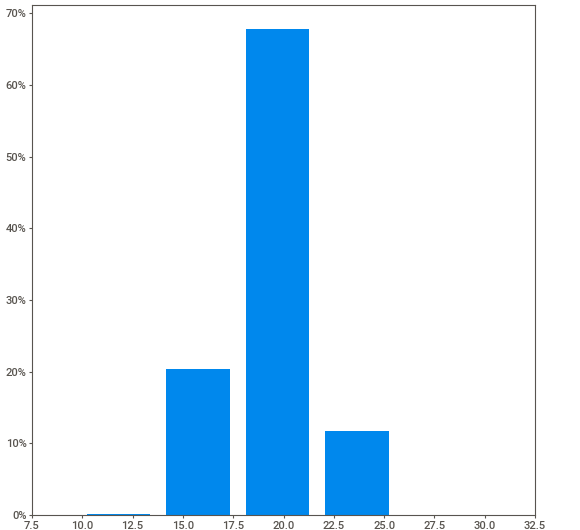
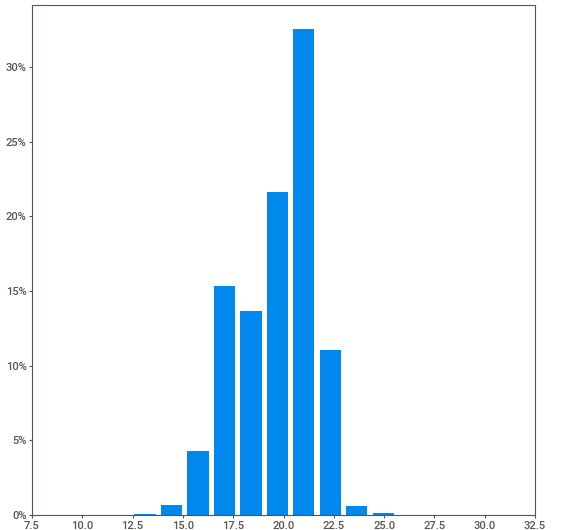
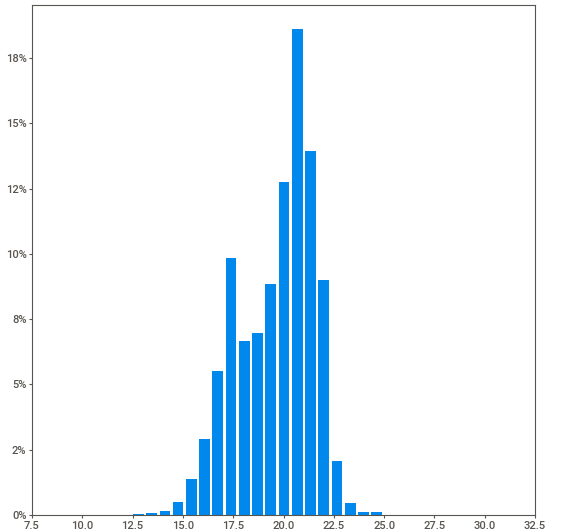
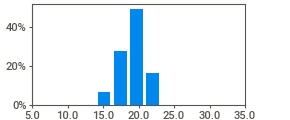
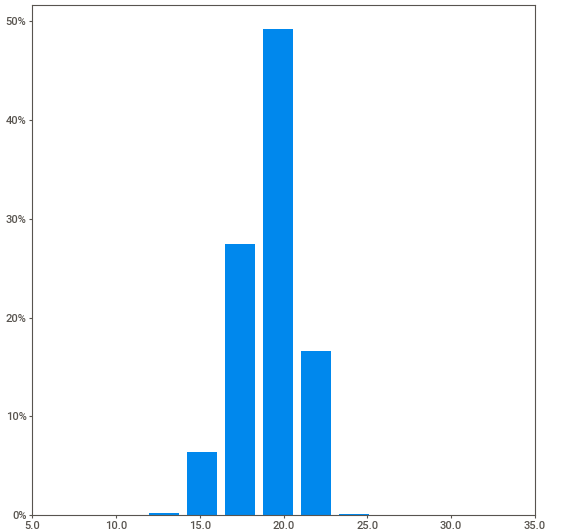
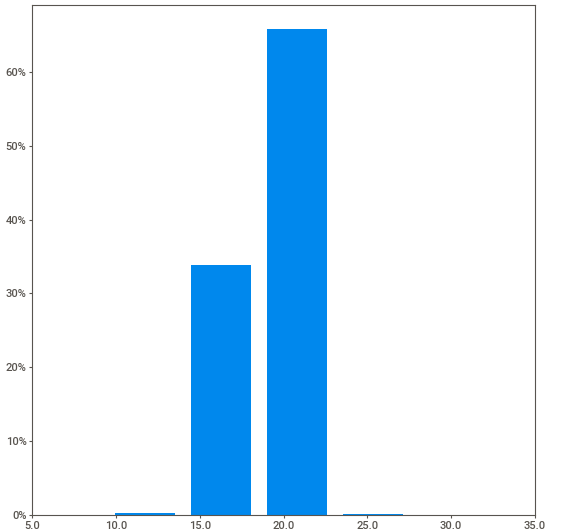
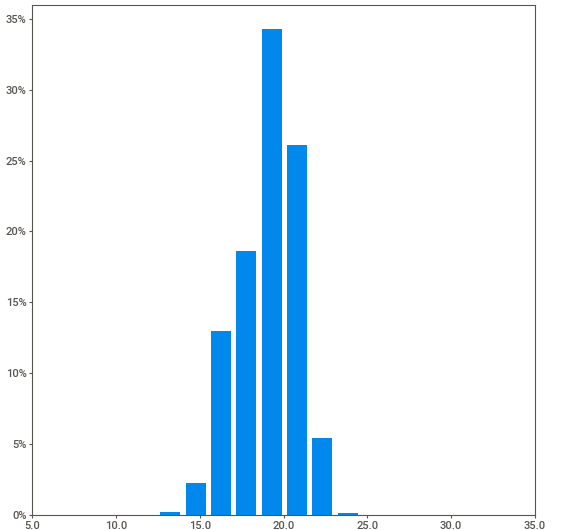
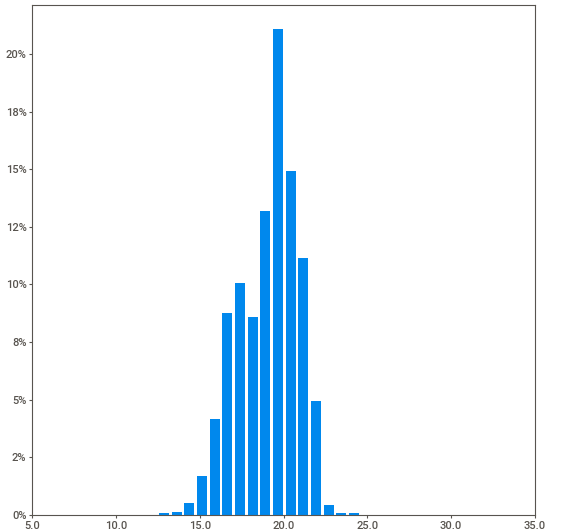
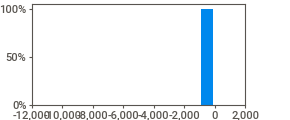
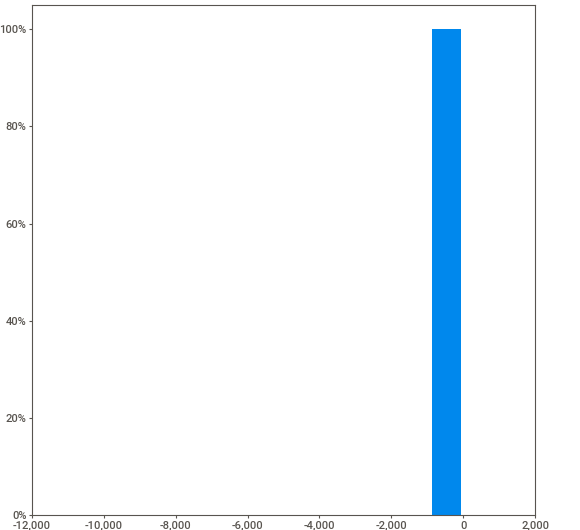
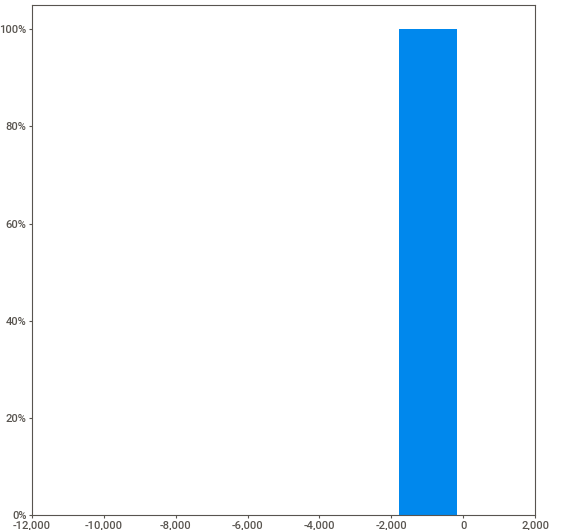
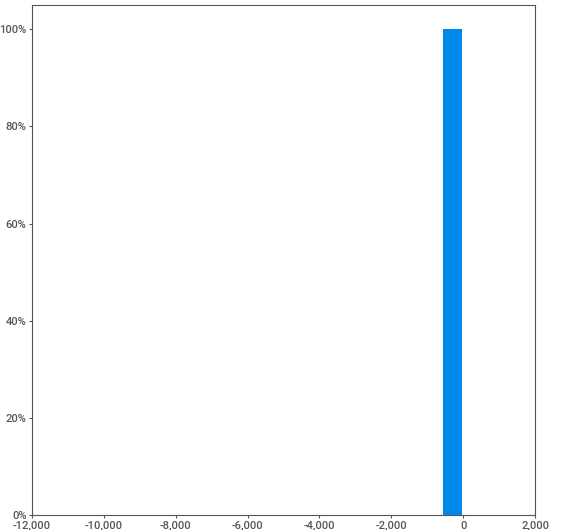
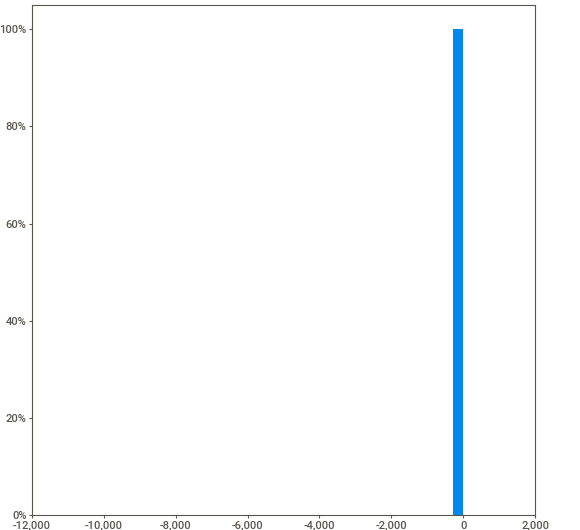
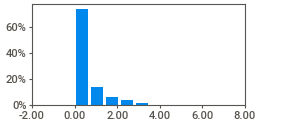
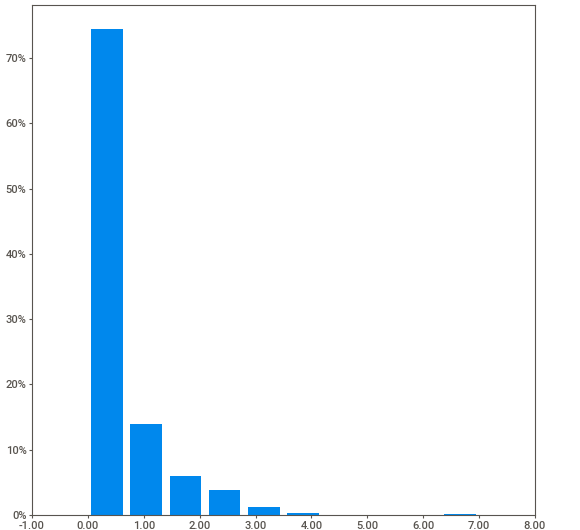
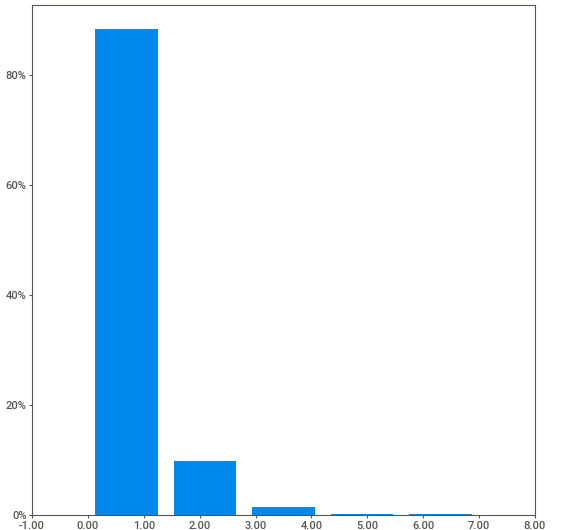
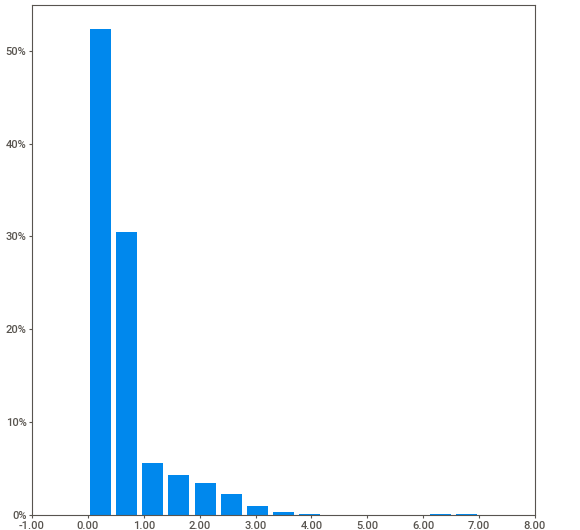
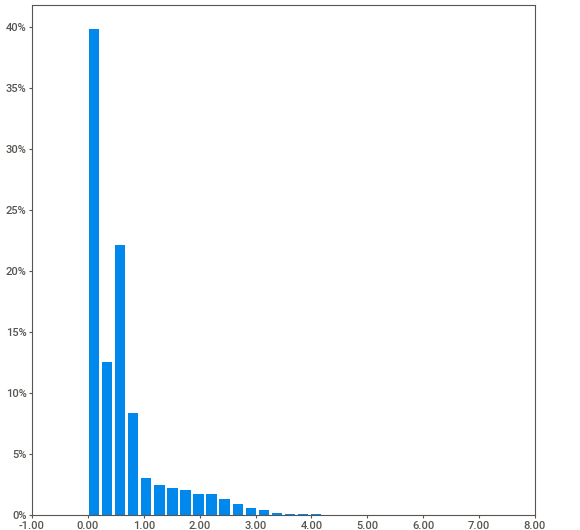
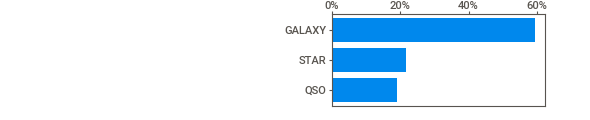
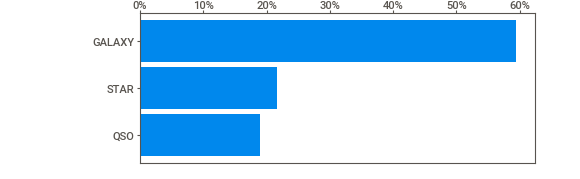
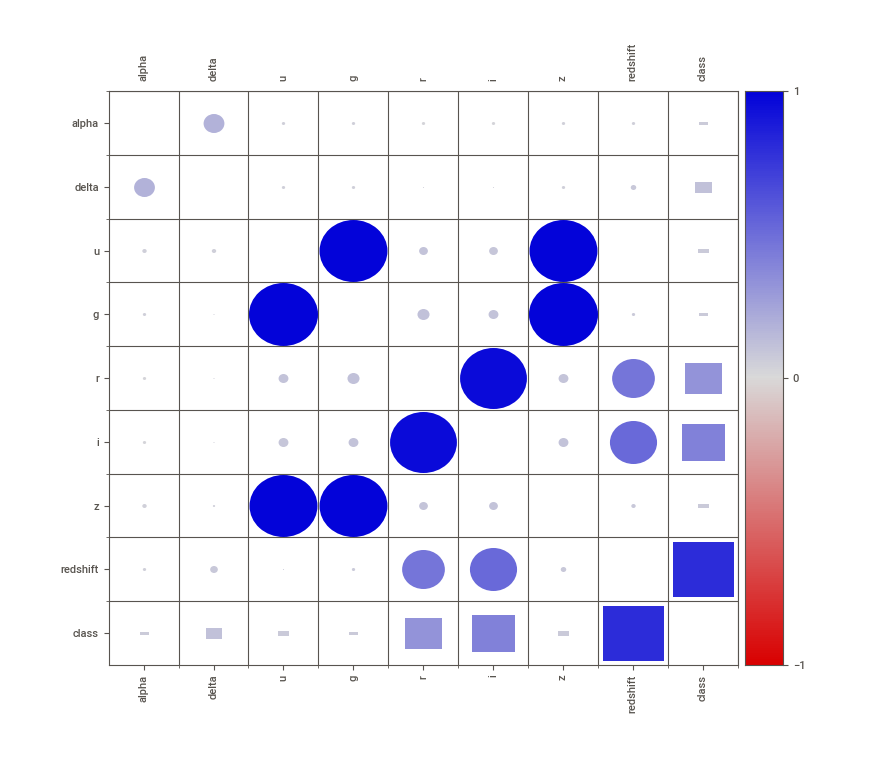
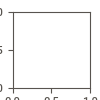

In [173]:
report = sv.analyze(df)
report.show_notebook(layout='vertical',scale=1)

* No missing values in the data

## Correlation Matrix

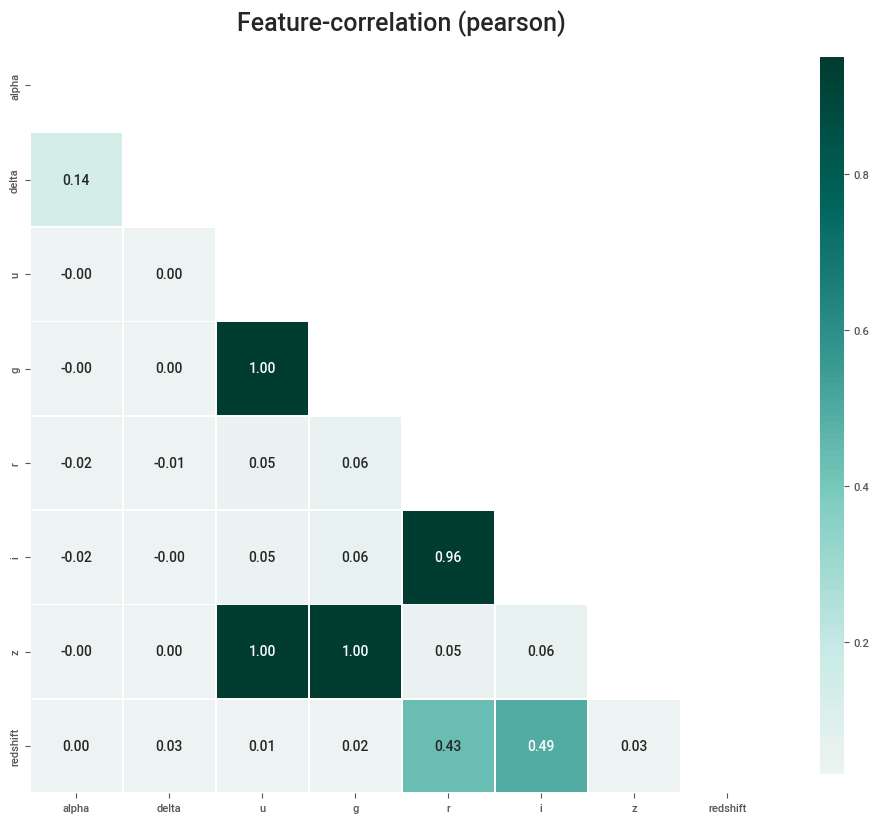

In [174]:
klib.corr_plot(df);

## Splitting data into train and test

### Input and target columns

In [175]:
input_col = ['alpha','delta','u','g','r','i','z','redshift']
target_col = 'class'

In [176]:
print(input_col)

print(target_col)

['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
class


### Scaling data of input columns

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
scaler = MinMaxScaler()

In [179]:
scaler.fit(df[input_col])

MinMaxScaler()

In [180]:
df[input_col] = scaler.transform(df[input_col])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Splitting data into input and output dataframe

In [181]:
X =df[input_col].copy()
y =df[target_col].copy()

###Splitting data into train and testset

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [184]:
print('Input trainset length :',len(X_train))
print('Output trainset Length :',len(y_train))
print('Input testset length :',len(X_test))
print('Output testset Length :',len(y_test))

Input trainset length : 80000
Output trainset Length : 80000
Input testset length : 20000
Output testset Length : 20000


# Training a Random Forest Classifier Model

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

## Fitting train data

In [187]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

## Model Evaluation

In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [189]:
train_preds = model.predict(X_train)

In [190]:
train_preds

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'STAR', 'GALAXY', 'GALAXY'],
      dtype=object)

### Model Accuracy with test data

In [191]:
accuracy_score(y_train, train_preds)

0.9999875

### Model Prediction probability

In [192]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 1.  ],
       [0.7 , 0.  , 0.3 ],
       [0.99, 0.  , 0.01]])

In [193]:
model.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

## Model Evaluation with test data

### Model score

In [194]:
model.score(X_test,y_test)

0.97545

### Prediction Probs

In [195]:
test_probs = model.predict_proba(X_test)
print('   ',model.classes_)
test_probs

    ['GALAXY' 'QSO' 'STAR']


array([[1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.03, 0.  , 0.97],
       ...,
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

### Confusion Matrix

In [196]:
test_preds = model.predict(X_test)

In [197]:
cf_mat = confusion_matrix(y_test, test_preds)

Text(99.72222222222221, 0.5, 'True label')

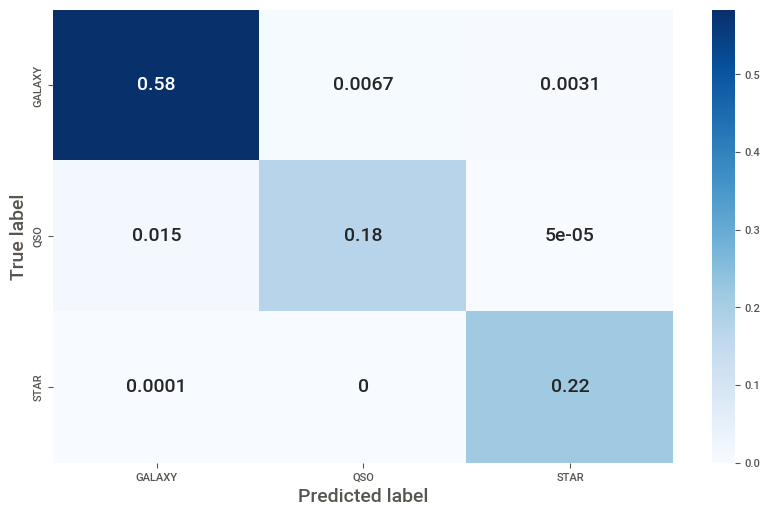

In [198]:
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_);
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Feature Importance

In [199]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

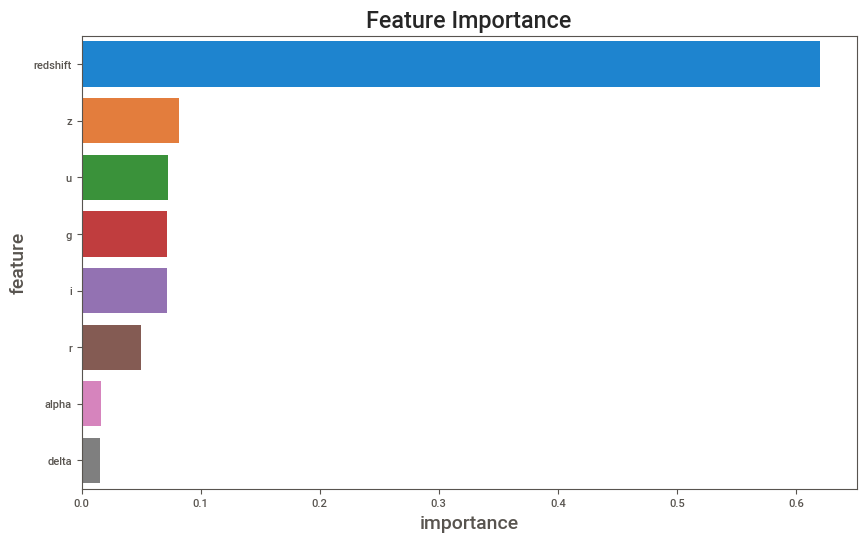

In [200]:
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

### Number of estimators

In [201]:
len(model.estimators_)

100

### Model Tree

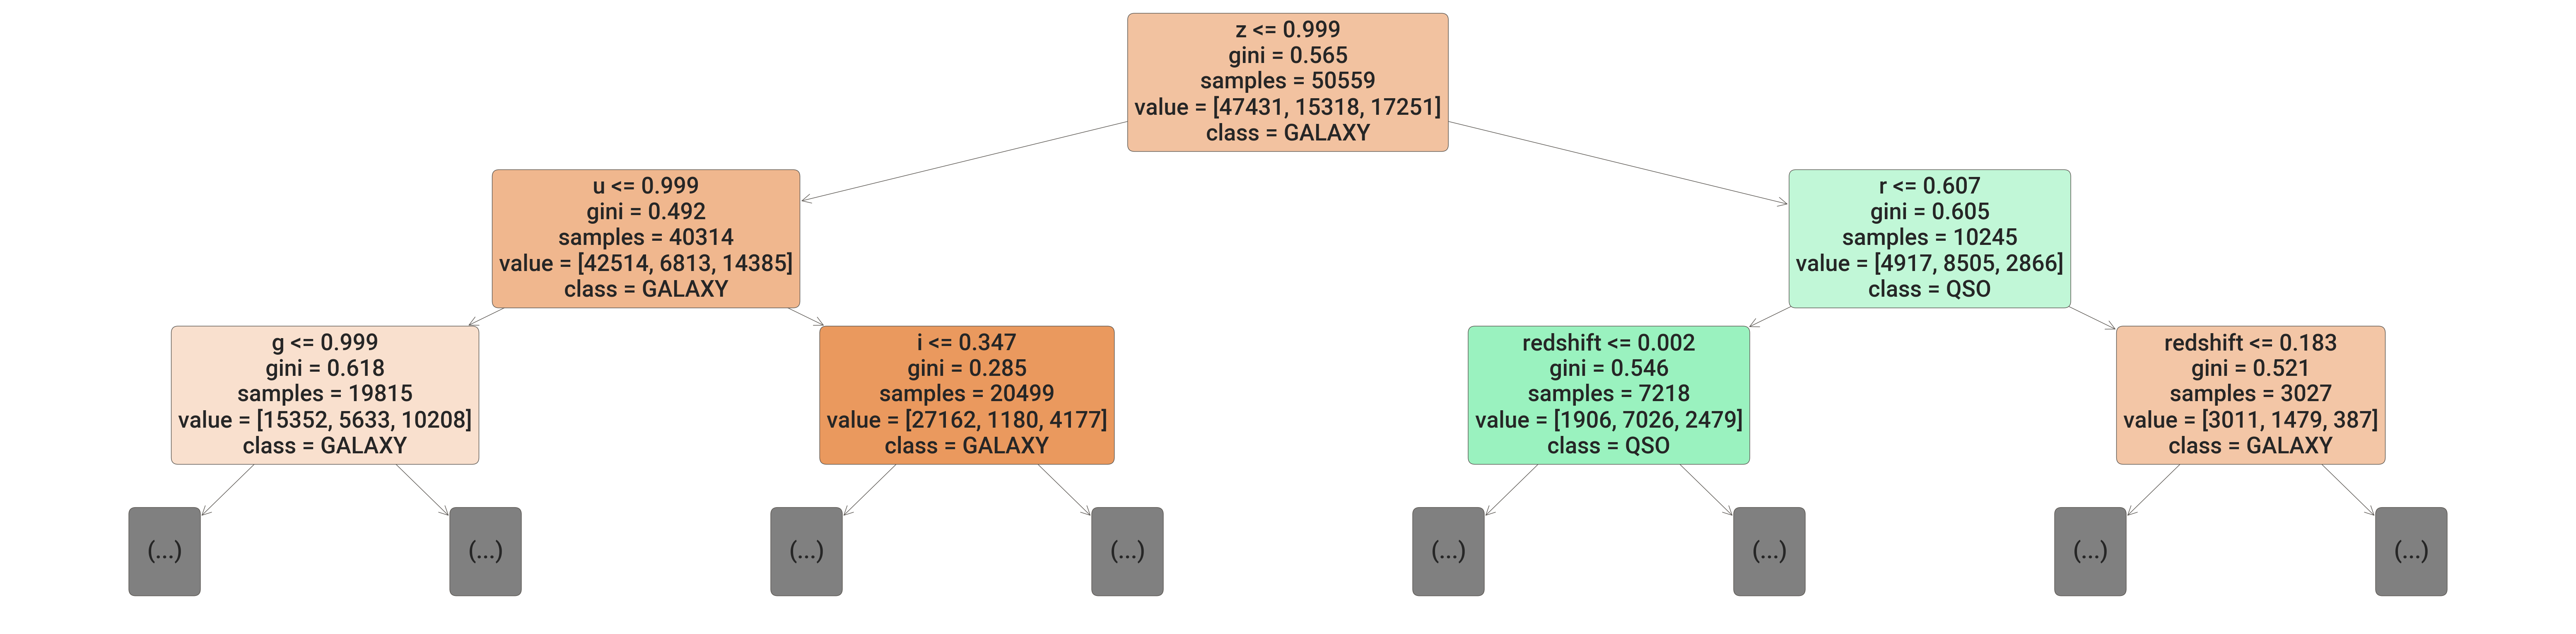

In [202]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

### Classification Report

In [203]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11860
         QSO       0.96      0.92      0.94      3797
        STAR       0.99      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



**Precision** is the number of correctly-identified members of a class divided by all the times the model predicted that class.

**Recall** is the number of members of a class that the classifier identified correctly divided by the total number of members in that class.

**F1 score** is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low.

#Saving and Loading Trained Models

In [225]:
import joblib

In [205]:
star_classifier = {
    'model': model,
    'scaler': scaler,
    'input_col': input_col,
    'target_col': target_col,
}

In [206]:
joblib.dump(star_classifier, 'star_classifier.joblib')

['star_classifier.joblib']

## Loading saved model

In [207]:
star_classifier =joblib.load('star_classifier.joblib')

## Prediction with single input

### Constructing a single input dict

In [217]:
new_input = {'alpha':1.597171, 'delta':16.193178, 'u':25.31584, 'g':25.31584, 'r':20.70736, 'i':19.79495, 'z':19.1033, 'redshift':0.496618}
# single_input=pd.DataFrame(new_input,index=[0])

### Prediction with new single input using loaded model input

In [214]:
def predict_input(loaded_model, single_input):
  input_df = pd.DataFrame([single_input],index=[0])
  input_df = loaded_model['scaler'].transform(input_df[loaded_model['input_col']])
  pred = loaded_model['model'].predict(input_df)
  return pred

In [215]:
predict_input(star_classifier,new_input)

array(['GALAXY'], dtype=object)

#OUTCOMES

* Achieved Accuracy with train data - 99.99

* Achieved Accuracy with test data - 97.54

* Model Accuracy with test data accuracy -  0.98

* Precision

     > GALAXY       0.98      
     > QSO          0.96      
     > STAR         0.99     